In [211]:
"""Import required libraries"""

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [212]:
#---Import the data set---
df=pd.read_csv("amazon.csv")
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [213]:
"""Preprocessing and Cleaning the reviews"""
#---Search for null vales---
print(df.info())
print(df.shape)
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   int64  
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 460.9+ KB
None
(4915, 12)
Unnamed: 0              0
reviewerName            1
overall                 0
reviewText           

In [214]:
df=df.dropna(axis=0)
print(df.shape)
print(df.isna().sum())

(4913, 12)
Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


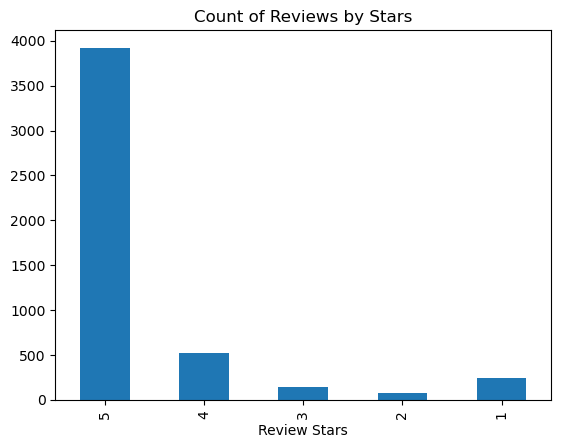

In [215]:
df["overall"].value_counts().sort_index(ascending=False).plot(kind="bar",title='Count of Reviews by Stars')
plt.xlabel("Review Stars")
plt.show()

In [216]:
#---Sentiment positive'+' or negative '-'---
df.loc[df['overall']<=3,'overall']=0
df.loc[df['overall']>3,'overall']=1


In [217]:
#---Clean the review text column by removing the stopwords.---

stp_words=stopwords.words('english')
def clean_review(review):
    cleanreview=" ".join(word for word in review.split() if word not in stp_words)
    return cleanreview
df['reviewText']=df['reviewText'].apply(clean_review)
#print(df['reviewText'].to_string(index=False))
df.reviewText.head(10)


1     Purchased device, worked advertised. You never...
2     works expected. I sprung higher capacity. I th...
3     This think worked great.Had diff. bran 64gb ca...
4     Bought Retail Packaging, arrived legit, orange...
5     It's mini storage. It anything else supposed t...
6     I phone never skips beat. File transfers speed...
7     It's hard believe affordable digital become. 3...
8     Works HTC Rezound. Was running short space 64G...
9     galaxy s4, super fast card, totally happy, hap...
10    I like SD Card take music video downloads, per...
Name: reviewText, dtype: object

In [218]:
""" Analysis of the data set"""

#---count the number of positive and negative sentiments---
print(df['overall'].value_counts())

1    4447
0     466
Name: overall, dtype: int64


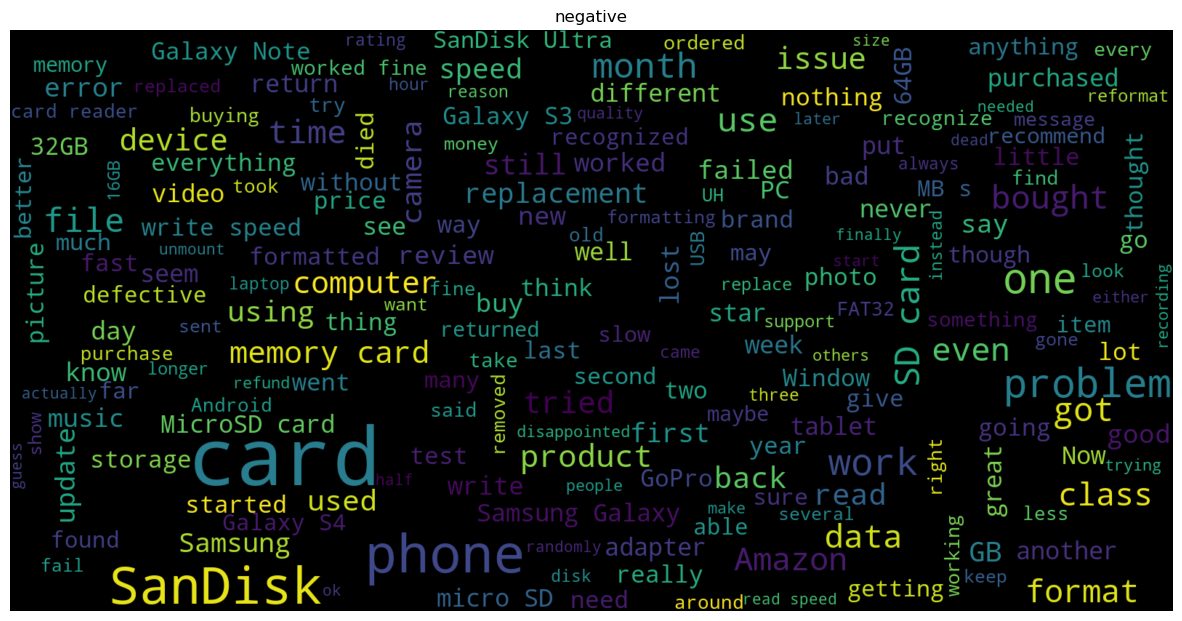

In [219]:
#---create the wordcloud with overall 0 or negative.---
consolidated=' '.join(word for word in df['reviewText'][df['overall']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.title('negative')
plt.show()


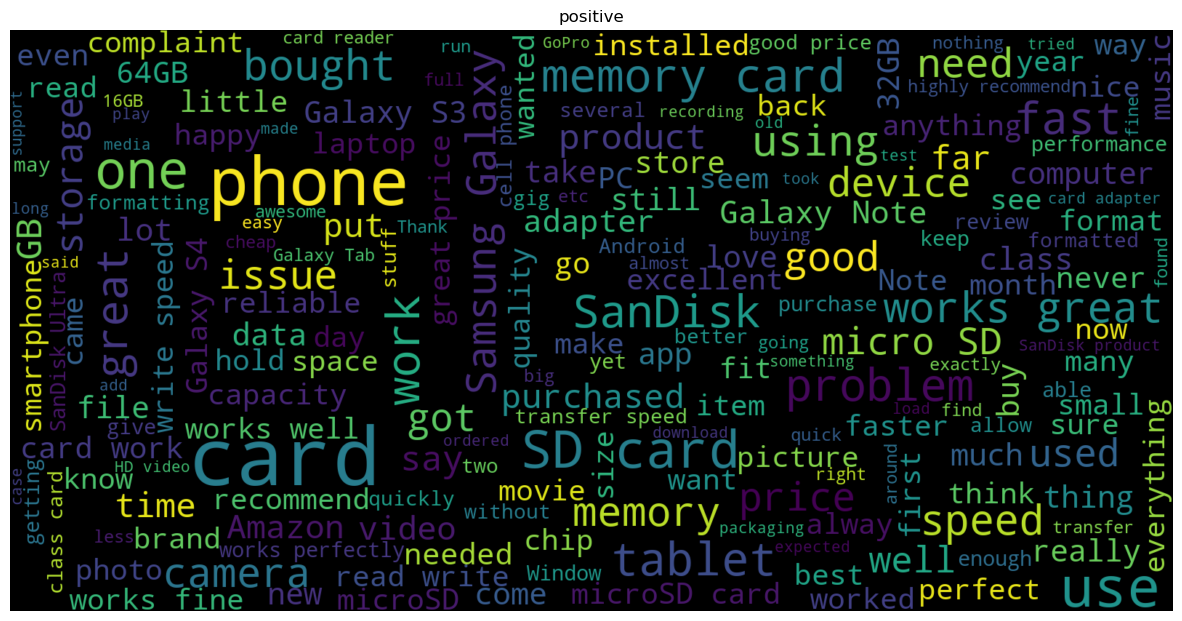

In [220]:
#---create the wordcloud with overall 1 or positive .---
consolidated=' '.join(word for word in df['reviewText'][df['overall']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.title('positive')
plt.show()


In [221]:
"""Convert text into vector"""
#CountVectorizer

cv =CountVectorizer(max_features=2500)
x =cv.fit_transform(df['reviewText']).toarray()

In [222]:
"""Model training,evaluation and prediction"""


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,df['overall'],test_size=0.25 ,random_state=0)

In [223]:
#---Logistic Regression---

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
 
#Model fitting
lr.fit(x_train,y_train)
 
#testing the model
pred=lr.predict(x_test)
# print(pred)


In [224]:
#model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("####### Logistic Regression USING VECTOR #######") 
#--- Confusion Matrix---

print("Confusion Matrix")
matrix = confusion_matrix(y_test, pred)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test, pred)
print(report)

#---accuracy---
ac=accuracy_score(y_test,pred)
print('test accuracy: {:.2f}%'.format(ac*100))

####### Logistic Regression USING VECTOR #######
Confusion Matrix
[[  68   40]
 [  14 1107]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       108
           1       0.97      0.99      0.98      1121

    accuracy                           0.96      1229
   macro avg       0.90      0.81      0.85      1229
weighted avg       0.95      0.96      0.95      1229

test accuracy: 95.61%


In [225]:

from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [226]:
print("####### NAIVE BAYES USING VECTOR ########")

#--- Confusion Matrix---

print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)

#---accuracy---
ac1=accuracy_score(y_test,y_pred)
print('test accuracy: {:.2f}%'.format(ac1*100))



####### NAIVE BAYES USING VECTOR ########
Confusion Matrix
[[ 47  61]
 [460 661]]

Classification Report
              precision    recall  f1-score   support

           0       0.09      0.44      0.15       108
           1       0.92      0.59      0.72      1121

    accuracy                           0.58      1229
   macro avg       0.50      0.51      0.44      1229
weighted avg       0.84      0.58      0.67      1229

test accuracy: 57.61%


In [227]:

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)


In [228]:
print("###### KNN USING VECTOR ######")

#--- Confusion Matrix---

print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)

#---accuracy---
ac2=accuracy_score(y_test,y_pred)
print('test accuracy: {:.2f}%'.format(ac2*100))


###### KNN USING VECTOR ######
Confusion Matrix
[[   4  104]
 [   2 1119]]

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.04      0.07       108
           1       0.91      1.00      0.95      1121

    accuracy                           0.91      1229
   macro avg       0.79      0.52      0.51      1229
weighted avg       0.89      0.91      0.88      1229

test accuracy: 91.38%


In [229]:

from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier(criterion='gini',random_state=0)
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)

In [230]:
print("###### DecisionTree USING VECTOR ######")

#--- Confusion Matrix---

print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)

#---accuracy---
ac3=accuracy_score(y_test,y_pred)
print('test accuracy: {:.2f}%'.format(ac3*100))

###### DecisionTree USING VECTOR ######
Confusion Matrix
[[  58   50]
 [  69 1052]]

Classification Report
              precision    recall  f1-score   support

           0       0.46      0.54      0.49       108
           1       0.95      0.94      0.95      1121

    accuracy                           0.90      1229
   macro avg       0.71      0.74      0.72      1229
weighted avg       0.91      0.90      0.91      1229

test accuracy: 90.32%


In [231]:
from sklearn.ensemble import RandomForestClassifier
rc= RandomForestClassifier(n_estimators=20,criterion='entropy')
rc.fit(x_train,y_train)
y_pred=rc.predict(x_test)


In [232]:
print("###### RandomForest USING VECTOR ######")

#--- Confusion Matrix---

print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)

#---accuracy---
ac4=accuracy_score(y_test,y_pred)
print('test accuracy: {:.2f}%'.format(ac4*100))

###### RandomForest USING VECTOR ######
Confusion Matrix
[[  30   78]
 [   9 1112]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.28      0.41       108
           1       0.93      0.99      0.96      1121

    accuracy                           0.93      1229
   macro avg       0.85      0.63      0.69      1229
weighted avg       0.92      0.93      0.91      1229

test accuracy: 92.92%


In [233]:
"""Convert text into scaler"""
#---Standard Scaler---


sc=StandardScaler()
x_train1=sc.fit_transform(x_train)
x_test1=sc.transform(x_test)
 

In [234]:
kn=KNeighborsClassifier()

kn.fit(x_train1,y_train)
y_pred=kn.predict(x_test1)


In [235]:
print("######## KNN  USING STANDARED SCALER########")

#--- Confusion Matrix---

print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)

#---accuracy---
ac5=accuracy_score(y_test,y_pred)
print('test accuracy: {:.2f}%'.format(ac5*100))

######## KNN  USING STANDARED SCALER########
Confusion Matrix
[[   1  107]
 [   1 1120]]

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       108
           1       0.91      1.00      0.95      1121

    accuracy                           0.91      1229
   macro avg       0.71      0.50      0.49      1229
weighted avg       0.88      0.91      0.87      1229

test accuracy: 91.21%


In [236]:
gb=GaussianNB()
gb.fit(x_train1,y_train)
y_pred=gb.predict(x_test1)

In [237]:
print("###########Naive Bayes USING STANDARD SCALER ###############")
#--- Confusion Matrix---
print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)

#---accuracy---
ac6=accuracy_score(y_test,y_pred)
print('test accuracy: {:.2f}%'.format(ac6*100))

###########Naive Bayes USING STANDARD SCALER ###############
Confusion Matrix
[[ 47  61]
 [462 659]]

Classification Report
              precision    recall  f1-score   support

           0       0.09      0.44      0.15       108
           1       0.92      0.59      0.72      1121

    accuracy                           0.57      1229
   macro avg       0.50      0.51      0.43      1229
weighted avg       0.84      0.57      0.67      1229

test accuracy: 57.45%


In [238]:
dc= DecisionTreeClassifier(criterion='gini',random_state=0)
dc.fit(x_train1,y_train)
y_pred=dc.predict(x_test1)

In [239]:
print("###### DecisionTree USING SCALER######")
#--- Confusion Matrix---
print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)

#---accuracy---
ac7=accuracy_score(y_test,y_pred)
print('test accuracy: {:.2f}%'.format(ac7*100))

###### DecisionTree USING SCALER######
Confusion Matrix
[[  59   49]
 [  68 1053]]

Classification Report
              precision    recall  f1-score   support

           0       0.46      0.55      0.50       108
           1       0.96      0.94      0.95      1121

    accuracy                           0.90      1229
   macro avg       0.71      0.74      0.72      1229
weighted avg       0.91      0.90      0.91      1229

test accuracy: 90.48%


In [240]:
rc= RandomForestClassifier(n_estimators=20,criterion='entropy')
rc.fit(x_train1,y_train)
y_pred=rc.predict(x_test1)

In [242]:
print("###### RandomForest USING SCALER ######")
#--- Confusion Matrix---
print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)

#---accuracy---
ac8=accuracy_score(y_test,y_pred)
print('test accuracy: {:.2f}%'.format(ac8*100))

###### RandomForest USING SCALER ######
Confusion Matrix
[[  27   81]
 [   7 1114]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.25      0.38       108
           1       0.93      0.99      0.96      1121

    accuracy                           0.93      1229
   macro avg       0.86      0.62      0.67      1229
weighted avg       0.92      0.93      0.91      1229

test accuracy: 92.84%
